## Применить метод классификации для следующих точек (написать программу нахождения разделяющей прямой между классами А и Б) 

(1, 1) А 


(9.4 6.4) Б 

(2.5, 2.1) А 


(8, 7.7) Б


(0.5, 2.2) А 


(7.9, 8.4) Б 


(7, 7) Б 


(2.8, 0.8) А 


(1.2, 3) А 


(7.8, 6.1) Б

In [32]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy as np

### создаем словарь с исходными данными, чтобы в итоге получить табличку. С ней удобней работать

In [2]:
dic = {'X':[1, 9.4, 2.5, 8, 0.5, 7.9,7,2.8,1.2,7.8],
      'y':[1, 6.4, 2.1, 7.7, 2.2, 8.4, 7, 0.8, 3, 6.1],
      'label':['А','Б','А','Б','А','Б','Б','А','А','Б']}

cоздание таблички:

In [3]:
data = pd.DataFrame(data=dic)
data

,X,y,label
0,1.0,1.0,А
1,9.4,6.4,Б
2,2.5,2.1,А
3,8.0,7.7,Б
4,0.5,2.2,А
5,7.9,8.4,Б
6,7.0,7.0,Б
7,2.8,0.8,А
8,1.2,3.0,А
9,7.8,6.1,Б


так как классы точек у нас в виде букв закодируем их в числовом виде с помощью LabelEncoder() из модуля sklearn

    А : 0
    Б : 1
    

In [4]:
label_encoder = preprocessing.LabelEncoder()

data["label"] = label_encoder.fit_transform(data["label"])
data

,X,y,label
0,1.0,1.0,0
1,9.4,6.4,1
2,2.5,2.1,0
3,8.0,7.7,1
4,0.5,2.2,0
5,7.9,8.4,1
6,7.0,7.0,1
7,2.8,0.8,0
8,1.2,3.0,0
9,7.8,6.1,1


In [5]:
data_A = data[data['label']==0]
data_B = data[data['label']==1]

## отрисовка исходных данных

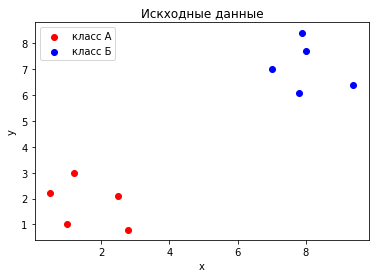

In [6]:
plt.scatter(data_A['X'],data_A['y'], c='r', label='класс А')
plt.scatter(data_B['X'],data_B['y'], c='b', label='класс Б')
plt.title('Искходные данные')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

##  Классификация
на самом деле применяю класстеризацию и ищу координаты центров классов. 

прямая, разделяющая 2 класса, будет проходить перпендикулярно прямой. проходящей через центроиды классов

In [14]:
from sklearn.cluster import KMeans
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
algorithm.fit(data[['X','y']])
labels1 = algorithm.labels_

#получаем центроиды классов
centroids = algorithm.cluster_centers_

In [21]:
centroids

array([[1.6 , 1.82],
       [8.02, 7.12]])

### результат класстеризации

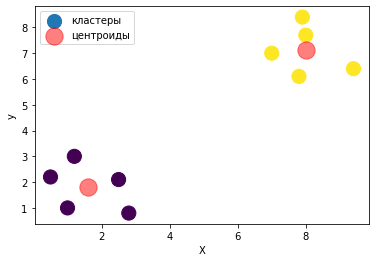

In [85]:
plt.clf()

plt.scatter( x = 'X',y = 'y', data = data[['X','y']] , c = labels1 , s = 200, label='кластеры')
plt.scatter(x = centroids[:,0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5,label='центроиды')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.show()

### найдем середину прямой, проходящей через центроиды по формуле:

$x_m = \frac {x_2+x_1}{2}$ $y_m = \frac {y_2+y_1}{2}$


In [57]:
#середина отрезка центоидов:
median = np.array([(centroids[0,0]+centroids[1,0])/2,(centroids[0,1]+centroids[1,1])/2])
median

array([4.81, 4.47])

Чтобы построить прямую, перпендикулярной прямой центроидов, необходимо найти угол наклона второй прямой в градусай и прибавить 90 градусов

угол накола считается по формуле:
$$coef = \frac{y_2-y_1}{x_2+x_1} $$

чтобы получить угол наклона, надо взять арктангенс от коэфициента наклона coef

In [48]:
import math
#угл.коф прямой центроидов, eугол наклона в градусах
cent_grad = math.degrees(math.atan((centroids[1,1]-centroids[0,1])/(centroids[1,0]-centroids[0,0])))
cent_grad

39.541212250672224

In [54]:
#угловой коэфициент примой, разделяющей кластеры
math.tan(cent_grad+90)

0.9056237164062833

строим прямую разделяющую классы. Одная точка у нас есть – это середина отрезка между центроидами. Вторую точку найдем. Для этого x1 присваиваем 0, и выражаем y1 из формулы коэфициента наклона прямой. В итоге получим:

$$ y_1 = coef*x_2 +y_2$$

In [59]:
y_m = math.tan(cent_grad+90)*median[0]+median[1]

In [87]:
y_m

8.826050075914221

Получаем, что прямая, разделяющая классы, имеет точки:

(4.81, 4.47), (0, 8.826)

найдем коефиценты a,b этой прямой(y = ax+b)

In [70]:
M1 = np.array([[median[0], 1], [0, 1]])
v1 = np.array([median[1],y_m])
kof = np.linalg.solve(M1, v1)

так как прямая по этим двум точкам коротковата, составим функцию для получения y, по заданным x и коэфициентам a,b

In [69]:
def func(a,b,x):
    return a*x+b

In [75]:
pr_x = np.arange(0,8)
pr_y = func(kof[0],kof[1],pr_x)

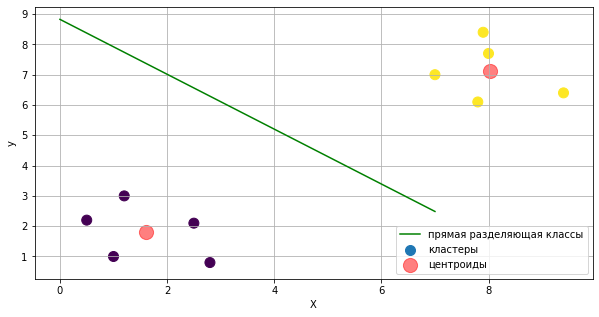

In [84]:
plt.figure(1 , figsize = (10, 5))
plt.plot(pr_x,pr_y, 'g', label='прямая разделяющая классы')
plt.scatter( x = 'X',y = 'y', data = data[['X','y']] , c = labels1 , s = 100, label='кластеры')
plt.scatter(x = centroids[:,0] , y =  centroids[: , 1] , s = 200 , c = 'red' , alpha = 0.5,label='центроиды')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()